In [1]:
import os

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from scipy import spatial

from operator import itemgetter

from sklearn.model_selection import train_test_split

# from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical

## Dataset

In [2]:
os.listdir('datasets')

X_train = np.load('datasets/k49-train-imgs.npz')['arr_0']
Y_train = np.load('datasets/k49-train-labels.npz')['arr_0']

X_test = np.load('datasets/k49-test-imgs.npz')['arr_0']
Y_test = np.load('datasets/k49-test-labels.npz')['arr_0']

label_map = pd.read_csv('datasets/k49_classmap.csv')

###############################
# !!! Balance the dataset !!! #
###############################

In [3]:
print(Y_test[:10])
print(label_map)

[19 23 10 31 26 12 24  9 24  8]
    index codepoint char
0       0    U+3042    あ
1       1    U+3044    い
2       2    U+3046    う
3       3    U+3048    え
4       4    U+304A    お
5       5    U+304B    か
6       6    U+304D    き
7       7    U+304F    く
8       8    U+3051    け
9       9    U+3053    こ
10     10    U+3055    さ
11     11    U+3057    し
12     12    U+3059    す
13     13    U+305B    せ
14     14    U+305D    そ
15     15    U+305F    た
16     16    U+3061    ち
17     17    U+3064    つ
18     18    U+3066    て
19     19    U+3068    と
20     20    U+306A    な
21     21    U+306B    に
22     22    U+306C    ぬ
23     23    U+306D    ね
24     24    U+306E    の
25     25    U+306F    は
26     26    U+3072    ひ
27     27    U+3075    ふ
28     28    U+3078    へ
29     29    U+307B    ほ
30     30    U+307E    ま
31     31    U+307F    み
32     32    U+3080    む
33     33    U+3081    め
34     34    U+3082    も
35     35    U+3084    や
36     36    U+3086    ゆ
37     37    U+308

In [4]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1) / 255
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1) / 255

num_class = len(np.unique(Y_train))
                
Y_train = to_categorical(Y_train, num_class)
Y_test = to_categorical(Y_test, num_class)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.2, random_state = 100)

In [5]:
print(f"""
Train set dimensions: {X_train.shape}, {Y_train.shape}
Test set dimensions: {X_test.shape}, {Y_test.shape}
Validation set dimensions: {X_val.shape}, {Y_val.shape}
""")


Train set dimensions: (185892, 28, 28, 1), (185892, 49)
Test set dimensions: (38547, 28, 28, 1), (38547, 49)
Validation set dimensions: (46473, 28, 28, 1), (46473, 49)



In [6]:
X = np.array(X_train)

(-0.5, 27.5, 27.5, -0.5)

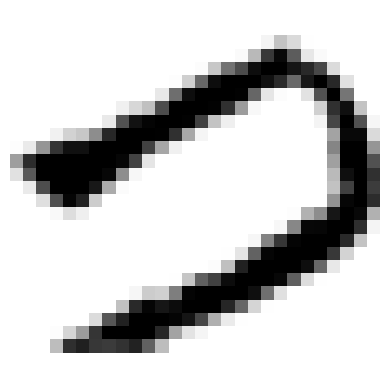

In [7]:
image = X[0].reshape(28,28)
plt.imshow(image, cmap="gray_r")
plt.axis('off')

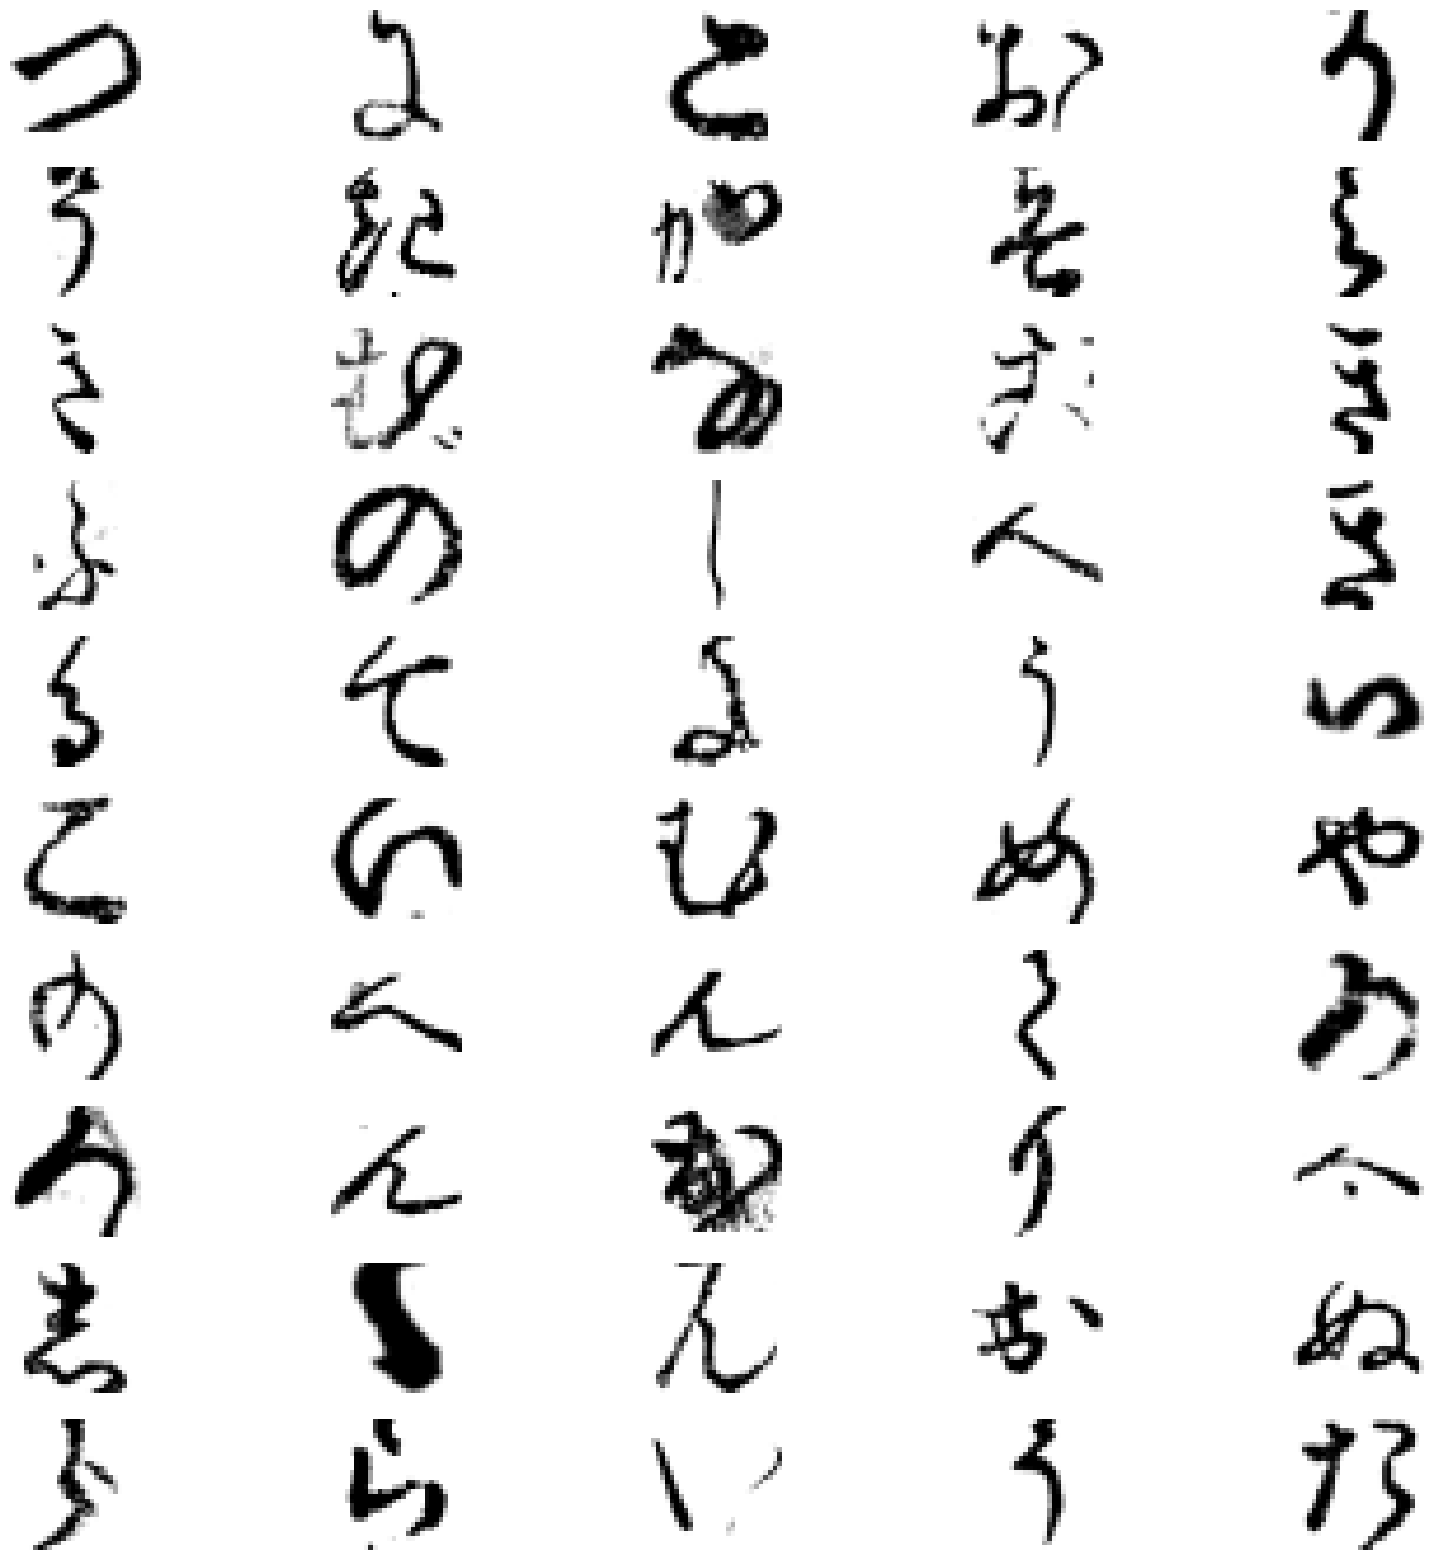

In [8]:
plt.figure(figsize=(20,20))
for i in range(0,50) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X[i].reshape(28,28), cmap="gray_r")

## NN definition

In [9]:
model = Sequential()
# First convolution
model.add(Conv2D(32,(5,5),activation = 'relu', input_shape = (28,28,1), padding="same"))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
# Second convolution
model.add(Conv2D(64,(5,5),activation = 'relu'))
# Third convolution
model.add(Conv2D(64,(5,5),activation = 'relu'))
model.add(Flatten())
# Feature extracture
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.4))
# Output layer
model.add(Dense(num_class,activation = 'softmax', kernel_regularizer='l2'))

model.summary()

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 64)          102464    
                                                                 
 flatten (Flatten)           (None, 2304)              0

In [10]:
history = model.fit(X_train, Y_train,
                    epochs=10,
                    batch_size=128,
                    verbose = 1,
                    validation_data = (X_val,Y_val))

Epoch 1/10
1453/1453 [==============================] - 16s 7ms/step - loss: 1.0272 - accuracy: 0.7701 - val_loss: 0.3676 - val_accuracy: 0.9210
Epoch 2/10
1453/1453 [==============================] - 10s 7ms/step - loss: 0.4496 - accuracy: 0.8951 - val_loss: 0.2819 - val_accuracy: 0.9369
Epoch 3/10
1453/1453 [==============================] - 9s 6ms/step - loss: 0.3507 - accuracy: 0.9177 - val_loss: 0.2352 - val_accuracy: 0.9490
Epoch 4/10
1453/1453 [==============================] - 9s 6ms/step - loss: 0.3019 - accuracy: 0.9288 - val_loss: 0.2315 - val_accuracy: 0.9510
Epoch 5/10
1453/1453 [==============================] - 9s 6ms/step - loss: 0.2659 - accuracy: 0.9380 - val_loss: 0.2014 - val_accuracy: 0.9562
Epoch 6/10
1453/1453 [==============================] - 10s 7ms/step - loss: 0.2407 - accuracy: 0.9437 - val_loss: 0.1961 - val_accuracy: 0.9570
Epoch 7/10
1453/1453 [==============================] - 9s 6ms/step - loss: 0.2219 - accuracy: 0.9481 - val_loss: 0.1891 - val_accura

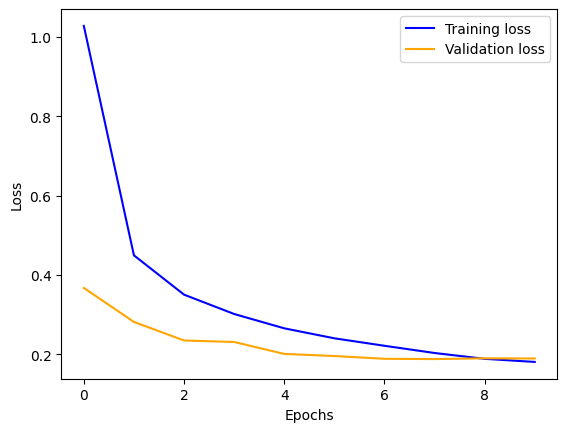

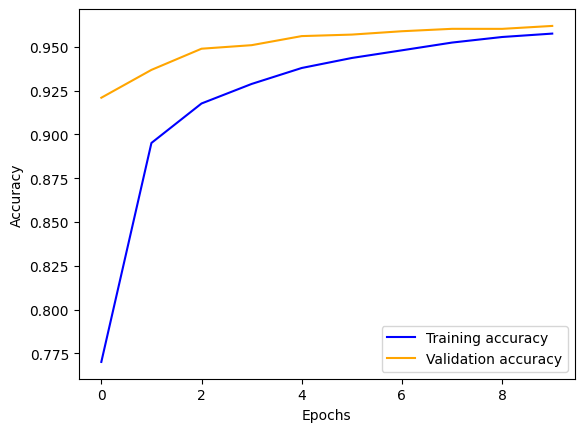

In [11]:
plt.plot(history.history['loss'], label = 'Training loss', color = 'blue')
plt.plot(history.history['val_loss'], label = 'Validation loss', color = 'orange')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['accuracy'], label = 'Training accuracy', color = 'blue')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy', color = 'orange')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

## Prediction

In [12]:
def get_kanji_by_idx(idx):
    return label_map[label_map['index'] == idx]['char'].values[0]

In [13]:
import random
history.history

print("Evaluate model on test data")
results = model.evaluate(X_test, Y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate a prediction using model.predict() 
# and calculate it's shape:

idxs = []

for i in range(100):
    idxs.append(random.randint(1, len(X_test)))
    
prediction = model.predict(X_test[idxs])
print("prediction shape:", prediction.shape)

for i in range(len(prediction)):
    pred_idx = np.argmax(prediction[i])
    true_idx = np.argmax(Y_test[idxs[i]])
    print(f"{i}: Predicted {get_kanji_by_idx(pred_idx)} / Original {get_kanji_by_idx(true_idx)}")

Evaluate model on test data
302/302 [==============================] - 1s 3ms/step - loss: 0.3228 - accuracy: 0.9331
test loss, test acc: [0.3227851986885071, 0.933120608329773]
4/4 [==============================] - 0s 14ms/step
prediction shape: (100, 49)
0: Predicted ま / Original ま
1: Predicted け / Original け
2: Predicted む / Original む
3: Predicted ほ / Original ほ
4: Predicted や / Original や
5: Predicted た / Original た
6: Predicted ぬ / Original ぬ
7: Predicted か / Original か
8: Predicted ま / Original ま
9: Predicted ら / Original ら
10: Predicted ま / Original ま
11: Predicted し / Original し
12: Predicted の / Original の
13: Predicted な / Original な
14: Predicted そ / Original そ
15: Predicted ひ / Original ひ
16: Predicted れ / Original れ
17: Predicted つ / Original つ
18: Predicted と / Original ら
19: Predicted な / Original な
20: Predicted を / Original を
21: Predicted ふ / Original ふ
22: Predicted に / Original に
23: Predicted た / Original た
24: Predicted る / Original ゐ
25: Predicted れ / Original 